In [22]:
# habilitate src folder to be imported from this notebook
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

____

In [13]:
from pathlib import Path
from src.utils import count_kmers_from_msa
from src.fcgr import FCGRFromKmerCount

In [10]:
k = 8 # kmer
fcgr = FCGRFromKmerCount(k)
path_msa = Path("/home/disco/Data/Pandora/subset-msas/Cluster_3303.fa")
kmer_count, nseqs= count_kmers_from_msa(k, path_msa, return_nseqs=True)

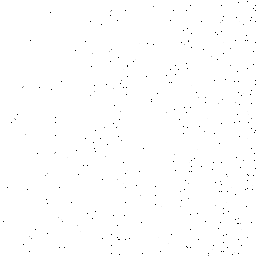

In [11]:
m = fcgr(kmer_count)
fcgr.plot(m)

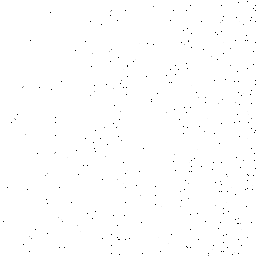

In [12]:
fcgr.plot(m / nseqs)

___
## Generate FCGR for a set of MSAs

In [24]:
import numpy as np
from collections import defaultdict
from pathlib import Path
from tqdm import tqdm

from src.utils import count_kmers_from_msa
from src.fcgr import FCGRFromKmerCount

## datasets
# input
FOLDER_MSA=Path("/home/disco/Data/Pandora/msas/") 
# output
PATH_SAVE=Path("data") 
PATH_SAVE.mkdir(exist_ok=True)

## fcgr
k = 6 
fcgr_from_kmer_count = FCGRFromKmerCount(k)

In [28]:
seqs_by_msa = defaultdict(int)

list_msa=list(FOLDER_MSA.rglob("*.fa"))
for path_msa in tqdm(list_msa):
    try:
        # count kmers
        kmer_count, nseqs= count_kmers_from_msa(k, path_msa, return_nseqs=True)
        
        # save fcgr 
        fcgr = fcgr_from_kmer_count(kmer_count)   
        np.save(file=PATH_SAVE.joinpath(path_msa.stem+".npy"), arr=fcgr)
        seqs_by_msa[str(path_msa)] = nseqs

    except:
        continue


100%|██████████| 37425/37425 [33:20<00:00, 18.71it/s]  


In [27]:
path_msa

PosixPath('/home/disco/Data/Pandora/msas/GC00000680_17.fa')